

# Project: The Movie Database Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  
<p>This is an Imdb dataset containing <b>10866</b> rows and  <b>21</b> rows displaying over 10,000 movies with the vote counts, popularity and revenue. </p>

**View column names below:**

In [17]:
df_movies.head(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Question(s) for Analysis
1. Does the popularity of the movie affect the revenue?
2. Which year has the highest number of movies released?
3. Which year had the highest  total number of vote count?
4. Relationship between vote count and the popularity?
5. The name of the movie with the highest  and lowest revenue?
6. The name of the movie with the highest and lowest runtime?

In [43]:
# importing packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline


In [19]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.4MB/s eta 0:00:01   52% |████████████████▉               | 5.5MB 29.5MB/s eta 0:00:01    83% |██████████████████████████▉     | 8.8MB 34.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01  1% |▌                               | 215kB 34.1MB/s eta 0:00:01    13% |████▎                           | 1.8MB 32.6MB/s eta 0:00:01    56% |██████████████████              | 7.5MB 23.4MB/s eta 0:00:01    76% |████████████████████████▋       | 10.3MB 28.9MB/s eta 0:00:01    95% |██████████████████████████████▍ | 12.7MB 26.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

 #### General Properties


In [44]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies= pd.read_csv('tmdb-movies.csv') 

In [45]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
#Check if there are missing values in each column.
df_movies.info()
df_movies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
#To know how many rows and columns are there in the dataset.
df_movies.shape

(10866, 21)


### Data Cleaning


**Dropping some column in the dataset using the .drop() function.**
>**Note:** Missing value found in some columns. Instead of ignoring it, i'll rather fill in with the mean value. 
I also noticed that all data type seems okay except the **_release_date_** column. So, i'll change to an ISO standard using the **to.datetime() method.** 

In [24]:
df_movies.drop(['cast', 'director','homepage', 'production_companies', 'tagline', 'overview', 'keywords'], axis = 1, inplace = True)

In [25]:
#To check
df_movies.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [26]:
#To count duplicates
sum(df_movies.duplicated())

1

In [27]:
#Drop duplicates and check 
df_movies.drop_duplicates(inplace = True)
sum(df_movies.duplicated())

0

In [28]:
#replacing null values with their respective mean using the fillna()
df_movies = df_movies.fillna(df_movies.mean())

In [29]:
#Changing release_date dtype

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

df_movies.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Does the popularity of the movie affect the revenue?)
<p>The higher the popularity, the higher the revenue?<p/>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38b14328d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f38b138d198>]], dtype=object)

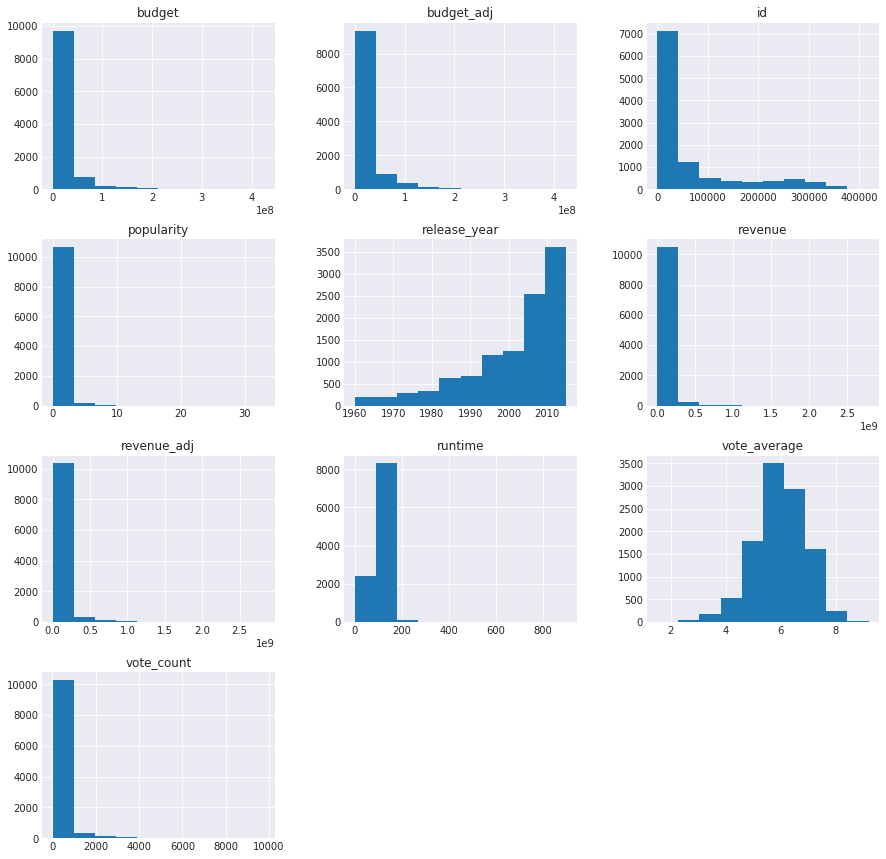

In [30]:
#df_movies.plot(x = 'popularity', y = 'revenue', kind = 'scatter')
df_movies.hist(figsize = (15, 15))

I needed to get more insights on all the numeric columns in the dataset. So, i created a histogram using the hist() function.

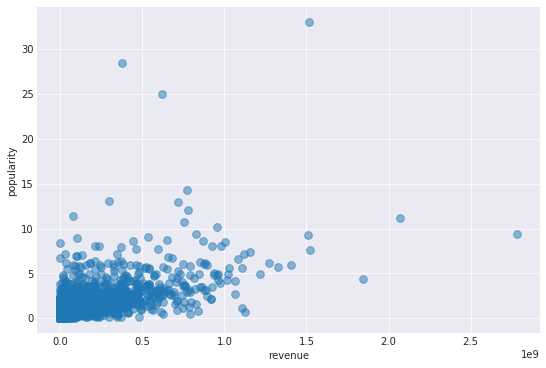

In [31]:
df_movies.plot(x = 'revenue', y = 'popularity', kind = 'scatter', figsize = (9,6), alpha = 0.5, s = 60)


**Reasoning section:** The points are seen closer to each other, viewing from the x - axis but not neccesary forming a straight line. Therefore, there's a weak positive correlation here. 

### Research Question 2  (Which year has the highest number of movies released?)

In [32]:
df_movies['release_year'] = df_movies['release_date'].apply(lambda x: x.year)


In [33]:
movie_year = df_movies.groupby('release_year')['original_title'].count()
movie_year

release_year
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
2060     32
2061     31
2062     32
2063     34
2064     42
2065     35
2066     46
2067     40
2068     39
2069     31
2070     41
2071     55
Name: original_title, dtype: int64

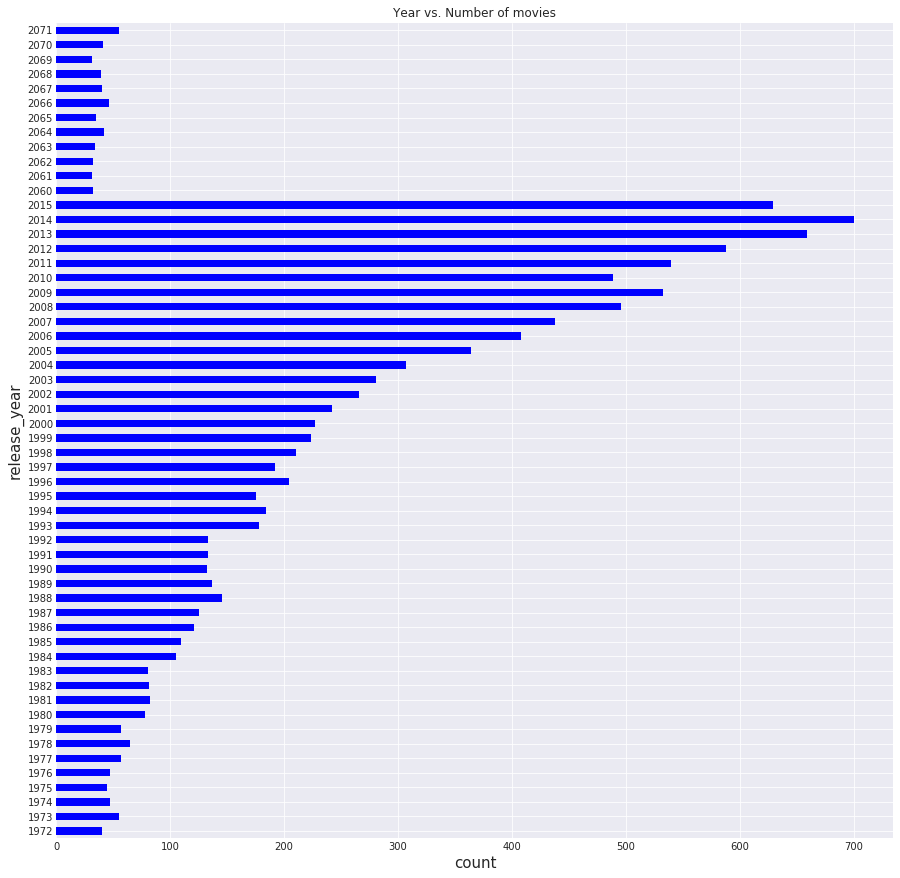

In [34]:
#Creating a funtion
def barh_plot(x , y , z):
    x.plot(kind = 'barh', figsize = (15, 15), color = 'blue')
    plt.title(y)
    plt.xlabel (z, fontsize = 15)
    plt.ylabel ('release_year', fontsize = 15)
    
barh_plot(movie_year, 'Year vs. Number of movies', 'count')

#You can use the code below for the same result
# movie_year.plot(kind = 'barh', figsize = (15, 15), color = 'blue')
# plt.title('Year vs. Number of movies')
# plt.ylabel('release_year', fontsize = 15, )
# plt.xlabel('count', fontsize = 15)


**Reasoning Section:** Here, 2014 seems to be the year with the highest number of movies released. 2015 and 2013 are clearly seen to be the second best.

### Research Question 3  (Which year had the highest  total number of vote count?)
<p>Here, 2013 had the highest total number of vote counts, while 1966 seems to be year with the lowest.<p/>

In [35]:
year_vote_count = df_movies.groupby('release_year')['vote_count'].sum()
year_vote_count

release_year
1972      5433
1973      5173
1974      5207
1975      6088
1976      4720
1977      8031
1978      4898
1979      8830
1980     10898
1981      7480
1982     11385
1983      9886
1984     15371
1985     13761
1986     13675
1987     15064
1988     14576
1989     18657
1990     21575
1991     17006
1992     19447
1993     24284
1994     37591
1995     35810
1996     26031
1997     40985
1998     40042
1999     53447
2000     46206
2001     63058
2002     62904
2003     68425
2004     79200
2005     73336
2006     76083
2007     90391
2008    102562
2009    119689
2010    130039
2011    135439
2012    183539
2013    214486
2014    206262
2015    182422
2060      2481
2061      2405
2062      2392
2063      2816
2064      3137
2065      1820
2066      1460
2067      3102
2068      4217
2069      1733
2070      2011
2071      5081
Name: vote_count, dtype: int64

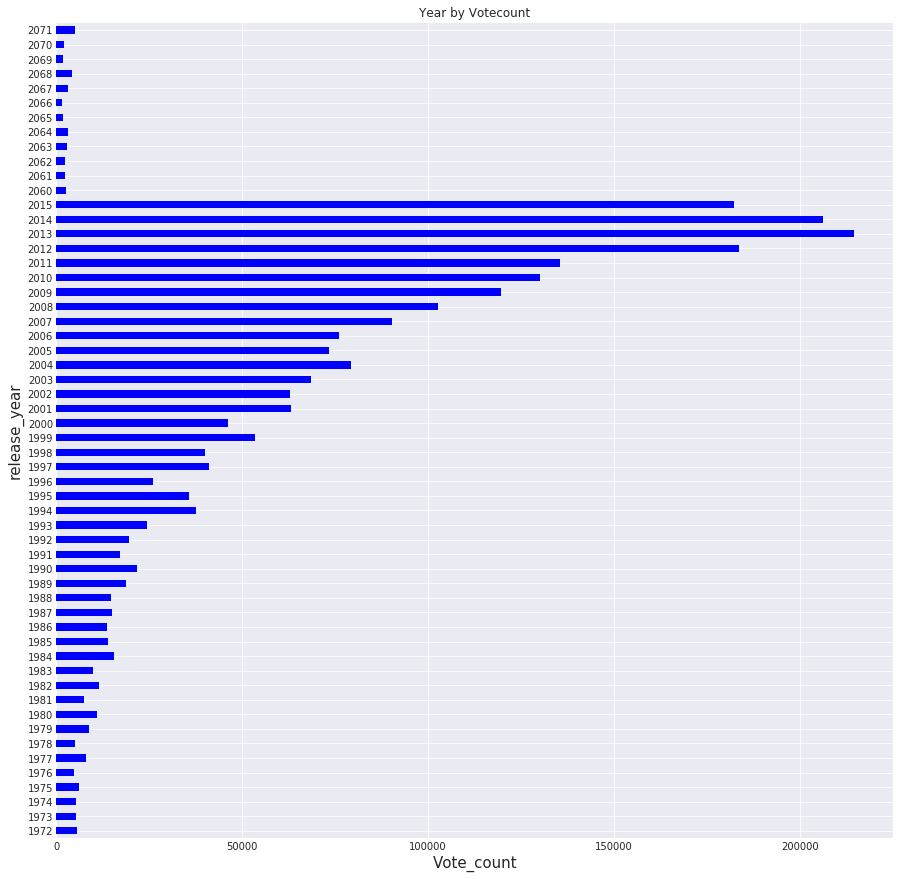

In [36]:
barh_plot(year_vote_count, 'Year by Votecount', 'Vote_count')

#You can use the code below for the same result
# year_vote_count.plot(kind = 'barh', figsize = (15, 15))
# plt.title('Year by Votecount')
# plt.ylabel('release_year', fontsize = 15)
# plt.xlabel('Vote_count', fontsize = 15)


**Reasoning section:** The year 2013 is seen to have the highest total number of vote counts for all movies released in that year. The year 2012, 2014 and 2015 also had higher vote count.

### Research Question 4 (Relationship between vote count and the popularity popularity of a movie?)


Text(0.5,1,'Popularity vs. Vote Count')

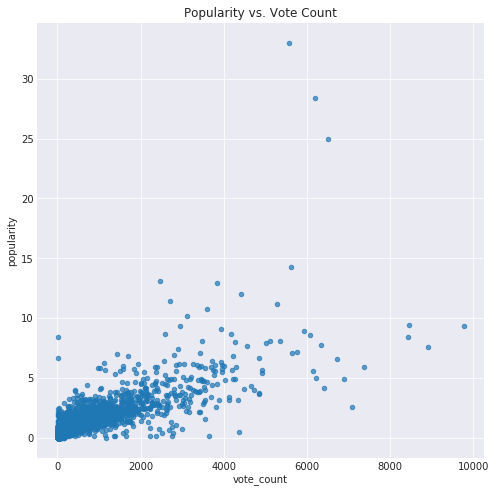

In [37]:
df_movies.plot(x = 'vote_count', y = 'popularity', kind = 'scatter', figsize = (8,8), alpha = 0.7)
plt.title('Popularity vs. Vote Count')

**Reasoning Section**: Most of the points are seen together moving to the right of the x - axis and a straight line can be drawn in the plot. Therefore, there's a strong positive correlation.</p>

### Research Question 5 (The name of the movie with the highest  and lowest revenue?)


In [38]:
maximium = df_movies['revenue'].max()
max_revenue = df_movies.original_title[df_movies['revenue'] == maximium]
print(max_revenue)


1386    Avatar
Name: original_title, dtype: object


In [39]:
minimium = df_movies['revenue'].min()
min_revenue = df_movies.original_title[df_movies['revenue'] == minimium]

print(min_revenue)

48                                              Wild Card
67                                               Survivor
74                                 Mythica: The Darkspore
75                         Me and Earl and the Dying Girl
92                               Mythica: The Necromancer
93                                                   Vice
100                                          Frozen Fever
101                                             High-Rise
103                              Spooks: The Greater Good
116                    The Scorpion King: The Lost Throne
122                                                Everly
133                                     Louder Than Bombs
140                   Dragonheart 3: The Sorcerer's Curse
143                                  Brothers of the Wind
145                                         Bone Tomahawk
147                                        Pawn Sacrifice
149                                              Momentum
151           

**Reasoning Section:** I made use of the min() and max() function to find the movies with the highest and lowest revenue. Avatar is the movie with the highest revenue and the result above are the movies that had the lowest revenue.

### Research Question 6  (The name of the Movies with the highest and lowest runtime?)
<p>The movie, "The story of film: An Odyssey" has the highest runtime of 900 minutes. <p/>

In [40]:
# movie with highest runtime.
maxi= df_movies['runtime'].max()
max_runtime = df_movies.original_title[df_movies['runtime'] == maxi]
print(max_runtime, ':Runtime =', maxi)


3894    The Story of Film: An Odyssey
Name: original_title, dtype: object :Runtime = 900


<b><p>The following list below show all movies with a runtime of 0 minutes. <p/></b>

In [41]:
# movie with highest runtime.
mini= df_movies['runtime'].min()
min_runtime = df_movies.original_title[df_movies['runtime'] == mini]
print(min_runtime, ':Runtime =', mini)

92           Mythica: The Necromancer
334                           Ronaldo
410                    Anarchy Parlor
445     The Exorcism of Molly Hartley
486                If There Be Thorns
595                         Deep Dark
616                      The Outfield
1241                        Dance-Off
1289                        Treehouse
1293                         Tim Maia
1849                     Spectacular!
2315             Listen to Your Heart
2370                  Freshman Father
3329         Grande, grosso e Verdone
3794             Toi, moi, les autres
3857                         Cell 213
3884                           eCupid
4063           Madea's Family Reunion
4138               A Time for Dancing
4829                             Rags
4944              How to Fall in Love
5216            Madea's Class Reunion
5695                 Skinwalker Ranch
5920           The Food Guide to Love
5938                      Go Goa Gone
5992                 Amiche da morire
6040        

**Reasoning Section:** I made use of the min() and max() function to find the movies with the highest and lowest runtime. The Story of Film: An Odyssey is the movie with the highest runtime of 900 minutes and the result above are the movies that had the lowest runtime of 0 minutes.

## Limitation: 
Null values were found in this dataset which could create an inaccurate analysis. So, i simply replaced all null values with their respective mean using the mean() function.

## Conclusion
In this analysis, i discovered the following:
<li>In the movie industry, 2015 had the highest revenue/income.</li>
<li>The year 2014 had the highest number of movie released. Although, 2013 and 2015 were the second best.</li>
<li>The number of vote count does not neccessary determine the popularity of the movie.</li>
<li>The year 2013, had the highest number of vote count.</li>
<li>In the movie industry, 2015 had the highest revenue/income.</li>


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0